In [3]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

## Breast Cancer Wisconsin (Diagnostic) DataSet

# In Brief
This dataset contains characteristics derived from digitized imaging of fine needle aspirates of a breast tumor cell mass.  The goal of this analysis is to train a machine leanring algorightms to accurately distinguish between a benign and malignant tumor to aid in clinical diagnosis.

Ten real-valued features were computed for each cell nucleus: 

* a) radius (mean of distances from center to points on the perimeter) 
* b) texture (standard deviation of gray-scale values) 
* c) perimeter 
* d) area 
* e) smoothness (local variation in radius lengths) 
* f) compactness (perimeter^2 / area - 1.0) 
* g) concavity (severity of concave portions of the contour) 
* h) concave points (number of concave portions of the contour) 
* i) symmetry 
* j) fractal dimension ("coastline approximation" - 1)

Original Dataset is available at the [UCA Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [19]:
# Load data from a csv file
Data = pd.read_csv('data.csv')
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
diagnosis_coder = {'M':1, 'B':0}
Data.diagnosis = Data.diagnosis.map(diagnosis_coder)
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
# Drop unecessary columns
Data.drop(['id','Unnamed: 32'], axis = 1, inplace = True)
Data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [22]:
# Reorder columsn so diagnosis is right-most
# First define a diagnosis series object
diagnosis = Data.diagnosis

In [23]:
# Then drop diagnosis from dataframe
Data.drop('diagnosis', axis = 1, inplace = True)

In [24]:
# Then append diagnsis to end of dataframe
Data['Diagnosis'] = diagnosis

In [25]:
# Take a quick glimpse of the dataset
Data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [26]:
# Quick glimpse of tumor features (mean values) in relation to diagnosis
Data.groupby('Diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [27]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data

Data_n = Data[Data['Diagnosis'] == 0]
Data_y = Data[Data['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(Data.columns[0:10])
print(Data_n)
print(Data_y)
print(features_means)
print(Data.columns[0:10])

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
37        13.030         18.42           82.61      523.8          0.08983   
46         8.196         16.84           51.71      201.9          0.08600   
48        12.050         14.63           78.04      449.3          0.10310   
49        13.490         22.30           86.91      561.0          0.08752   
50        11.760         21.60           74.72      427.9          0.08637   
51        13.640         16.34           87.21      571.8          0.07685   
52        11.940         18.24           75.71      437.6          0.08261   
55        11.520         18.75           73.34      409.0          0.09524   
58        13.050         19.31           82.61      527.2       

In [34]:
outcome_count = Data.Diagnosis.value_counts()#calculates how many malignant and how many bengin
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['Diagnosis']/sum(outcome_count['Diagnosis'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(Data.Diagnosis.value_counts()[1])/float((len(Data)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 37.25834797891037

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,Diagnosis,Percent
Benign,357,63
Malignant,212,37


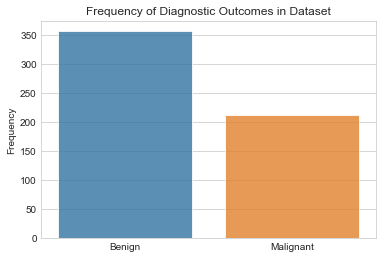

In [35]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

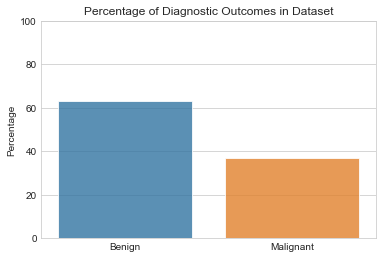

In [36]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = outcome_count, alpha = .8)
plt.title('Percentage of Diagnostic Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

#### Visual Inspection of data looking at distrubution/variance for histology of benign and malignant tumors biopsies.

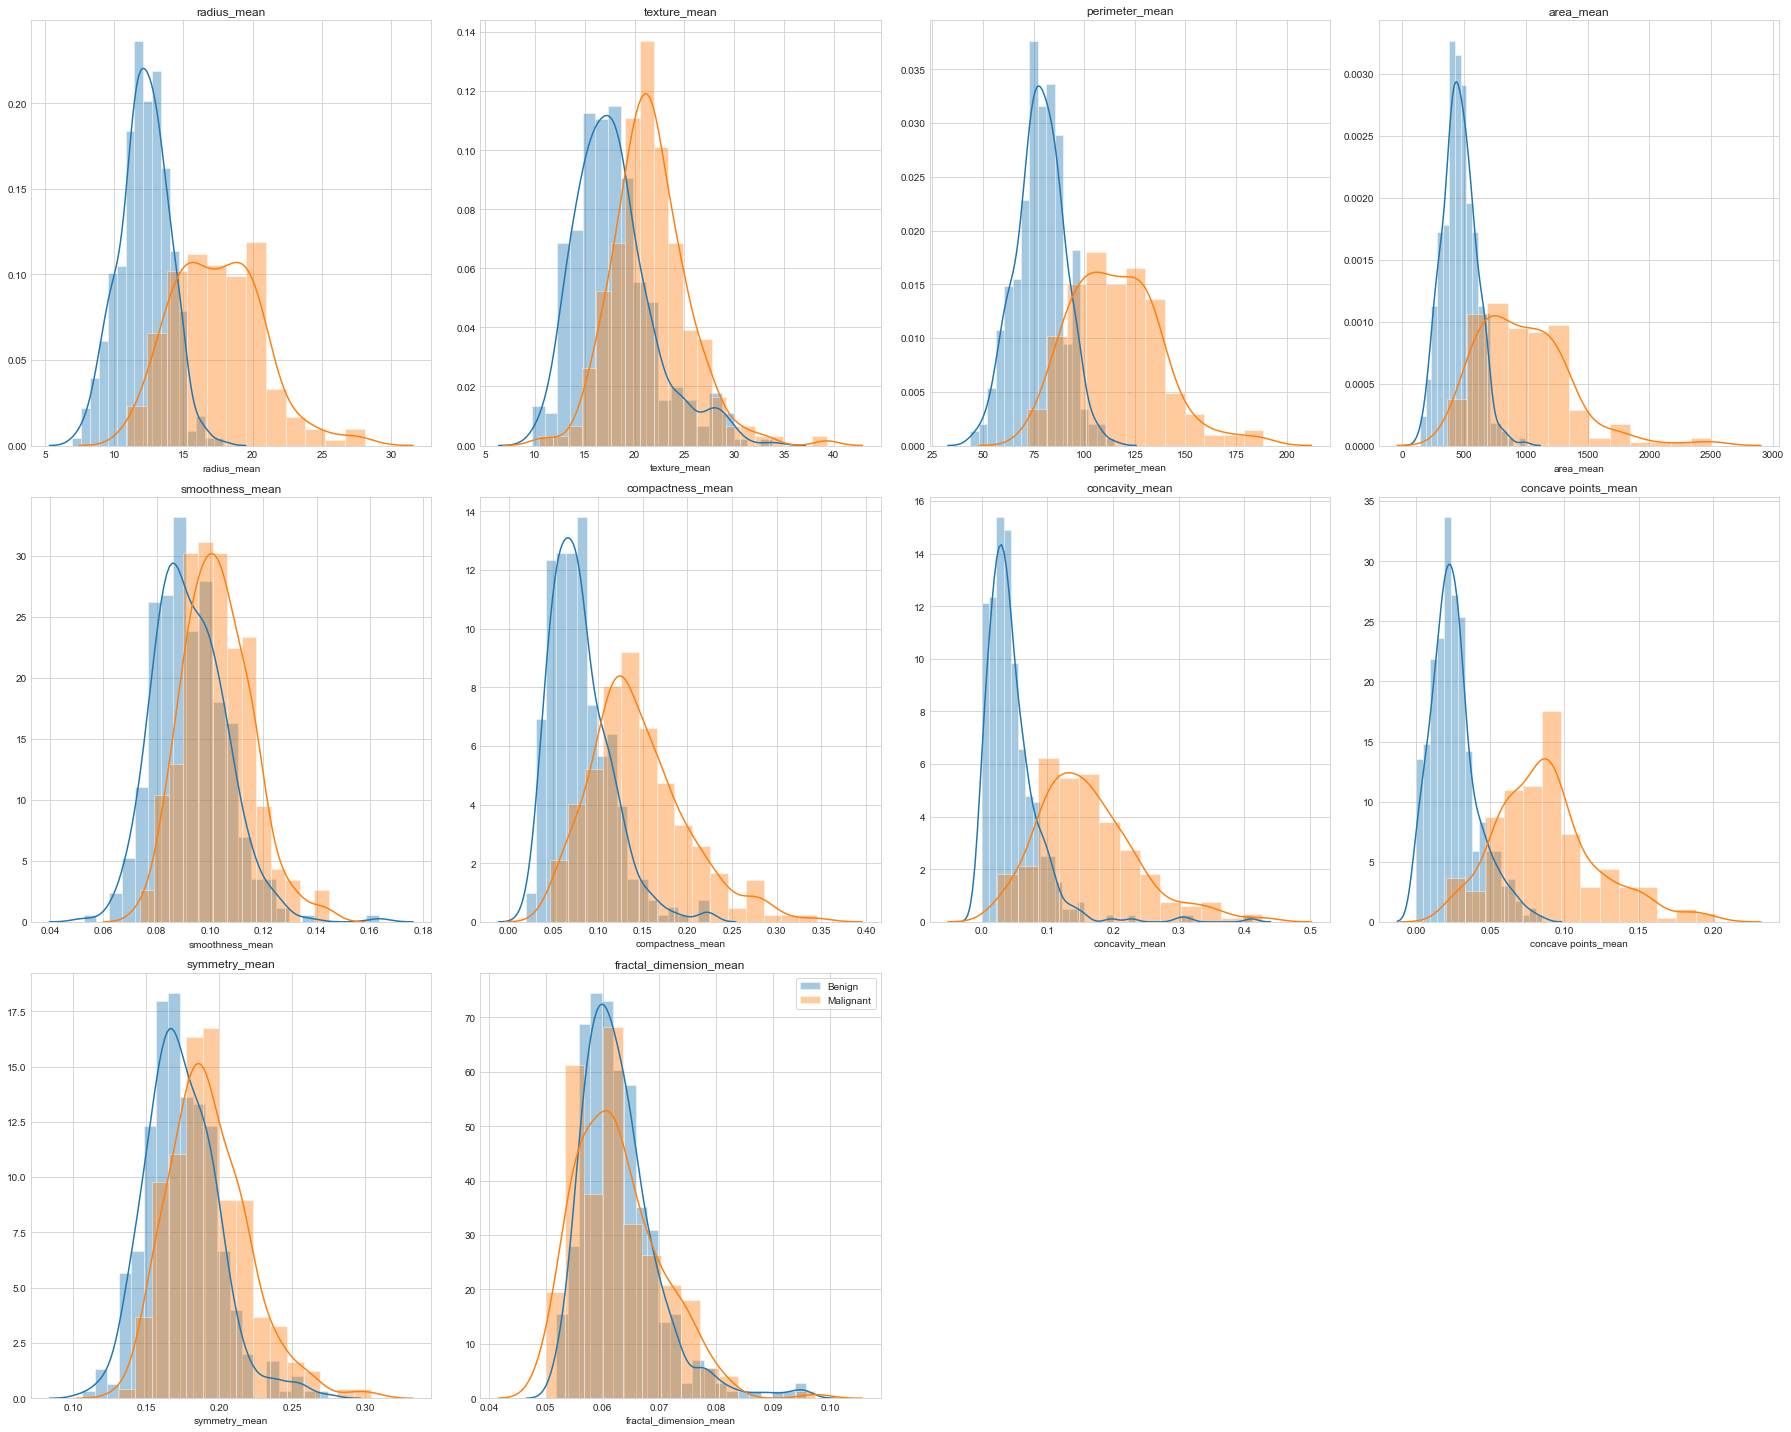

In [69]:
# Instantiate a figure object for OOP figure manipulation.

fig = plt.figure(figsize=(25,20))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(Data_n[b], kde=True, label='Benign')
    sns.distplot(Data_y[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

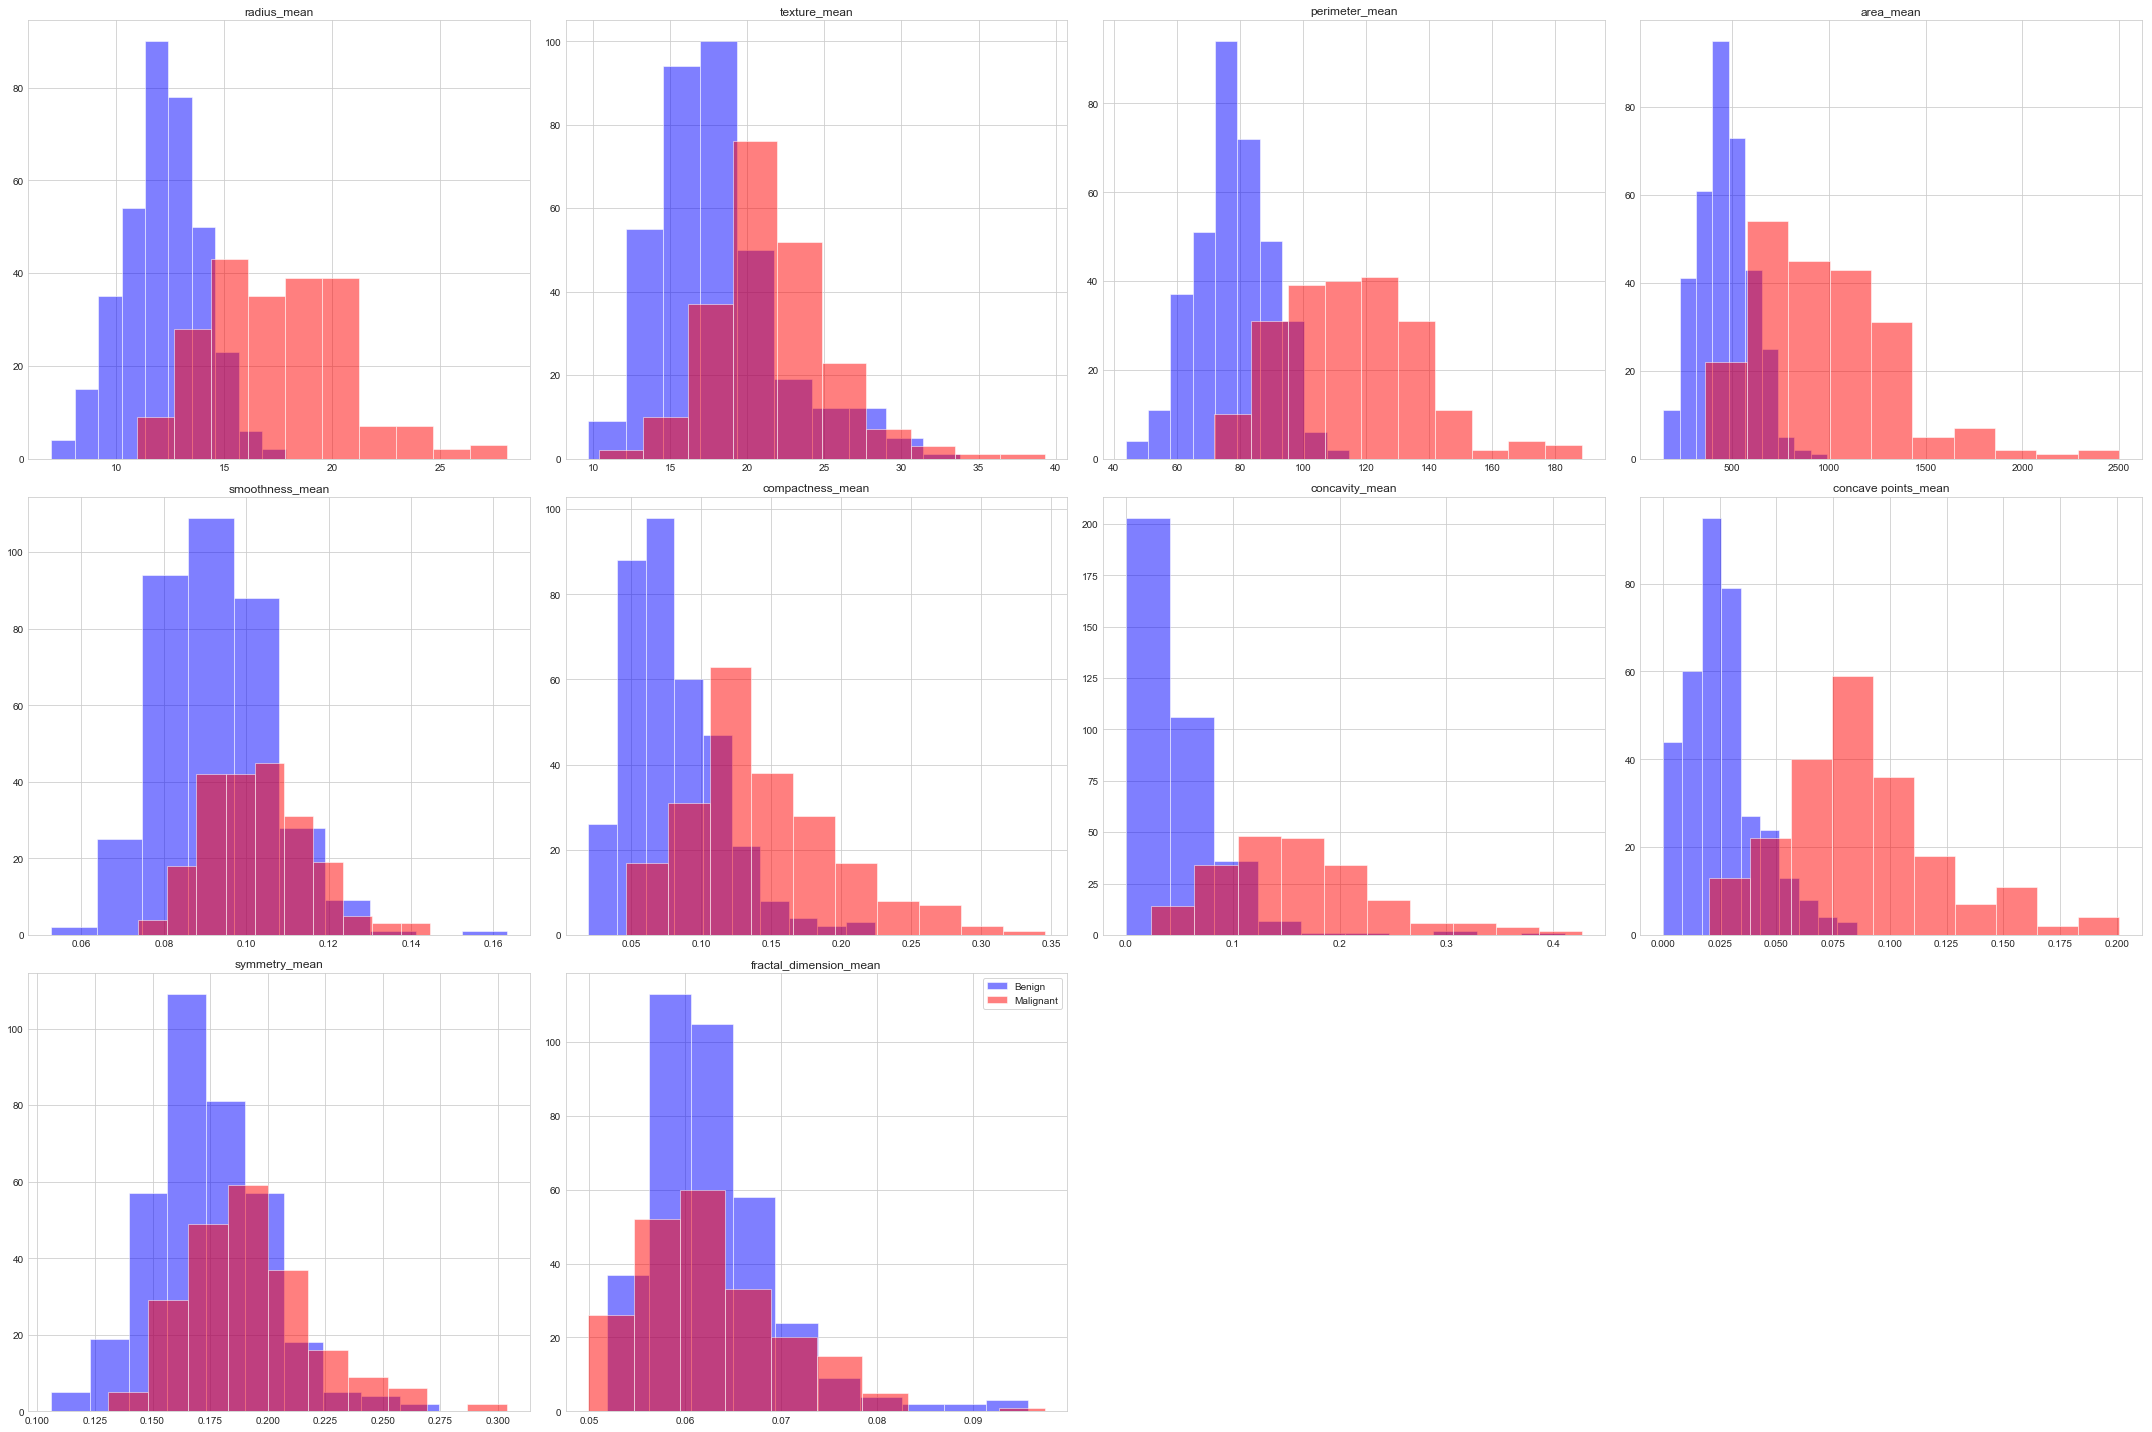

In [44]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure(figsize=(30,20))
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(Data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

No handles with labels found to put in legend.


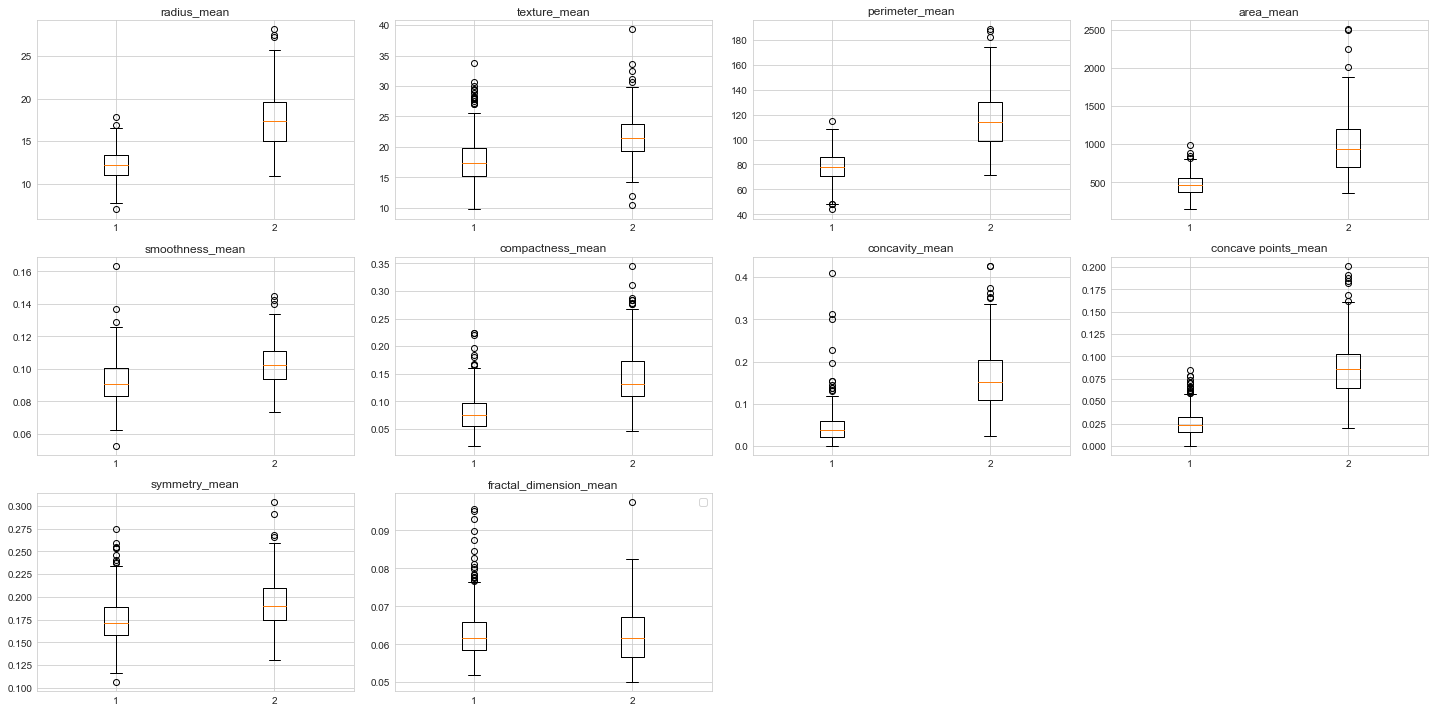

In [56]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([Data_n[b], Data_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

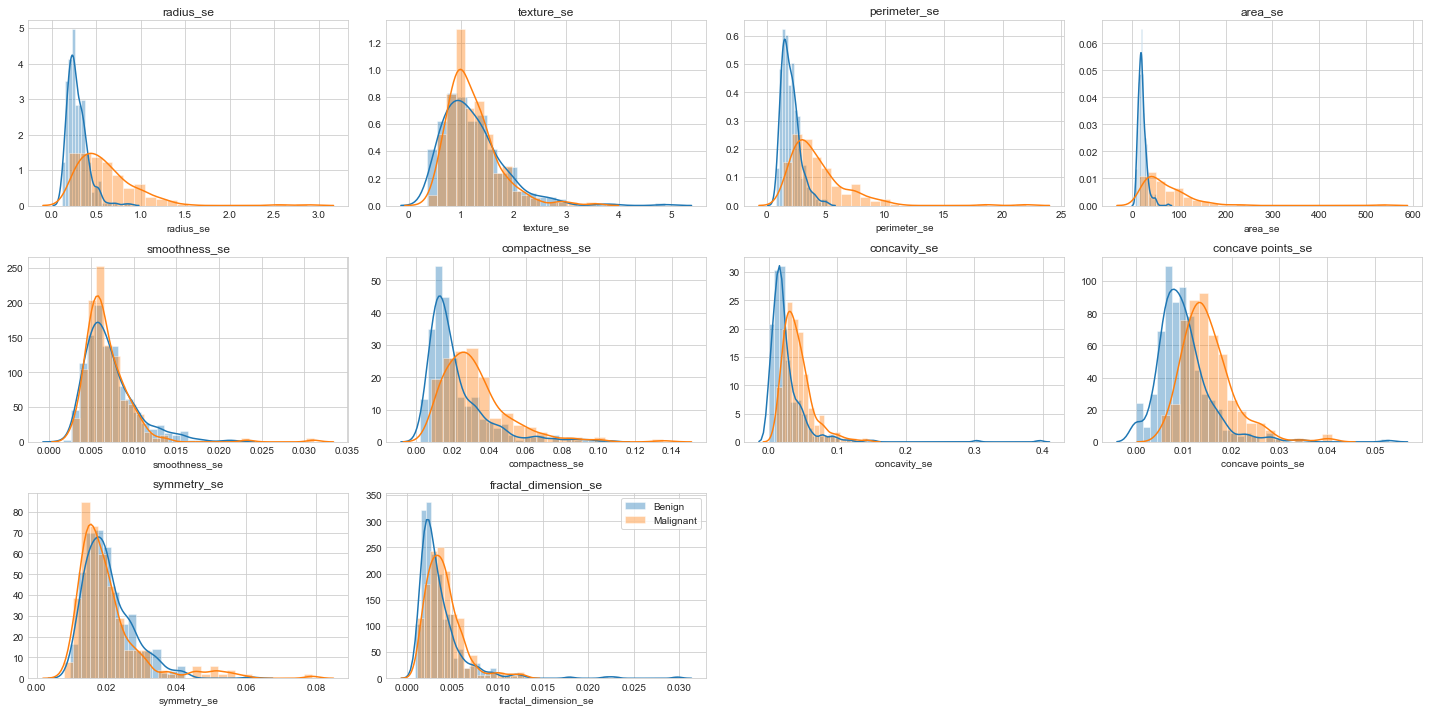

In [59]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(Data_n[b], kde=True, label='Benign')
    sns.distplot(Data_y[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

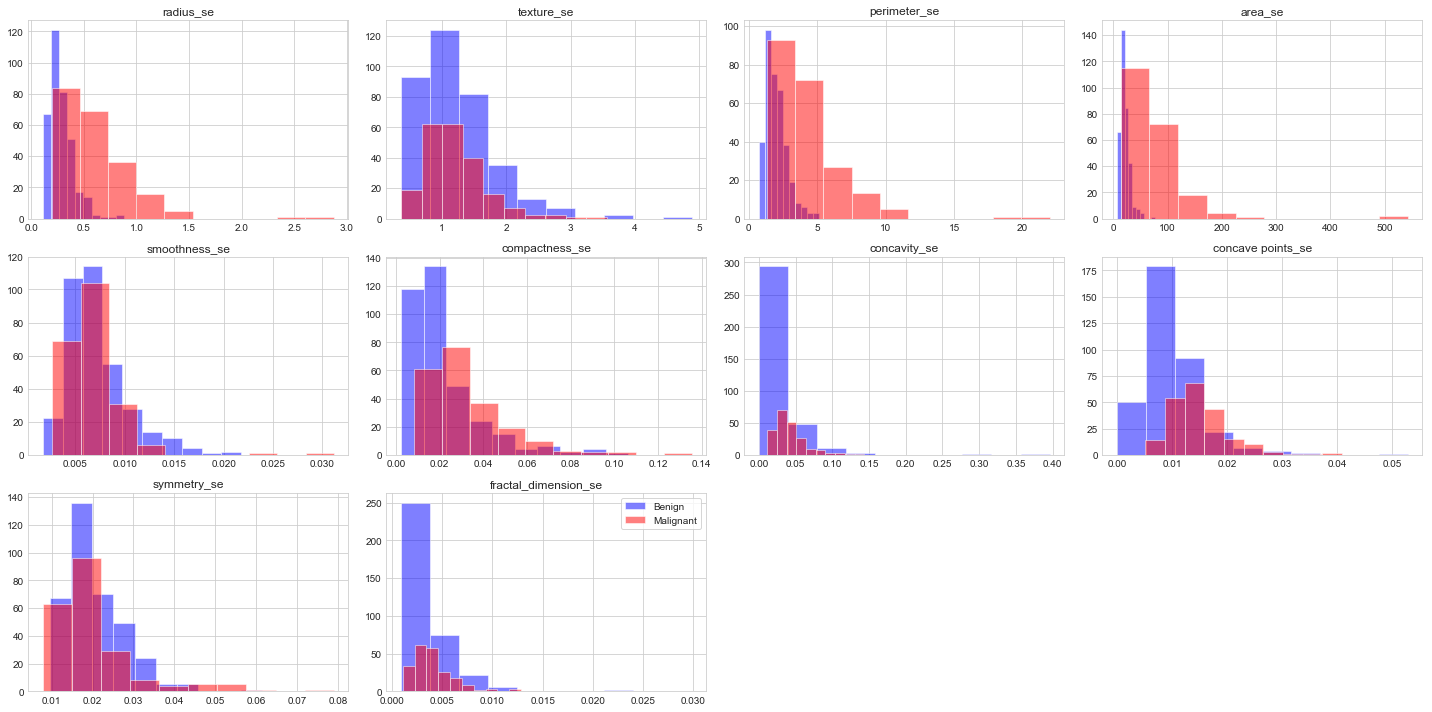

In [60]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(Data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

No handles with labels found to put in legend.


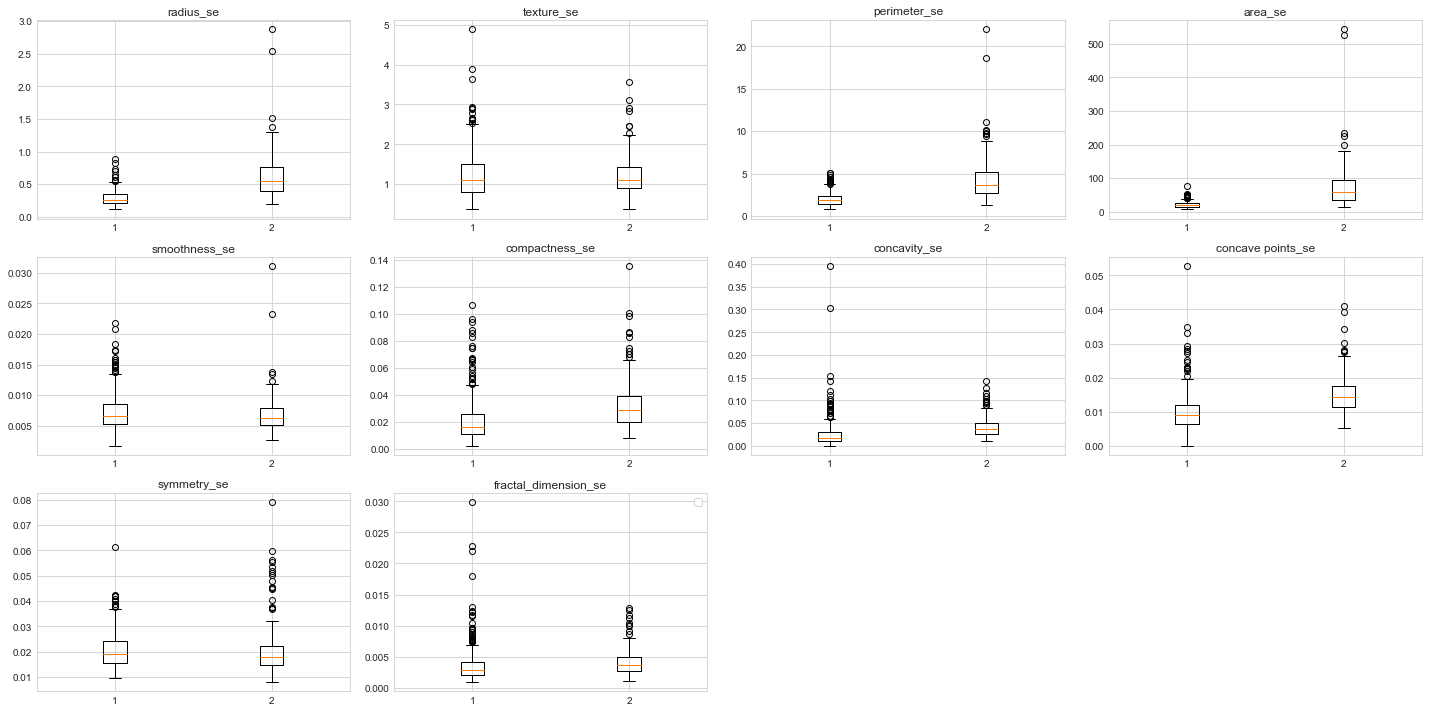

In [62]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    plt.boxplot([Data_n[b], Data_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

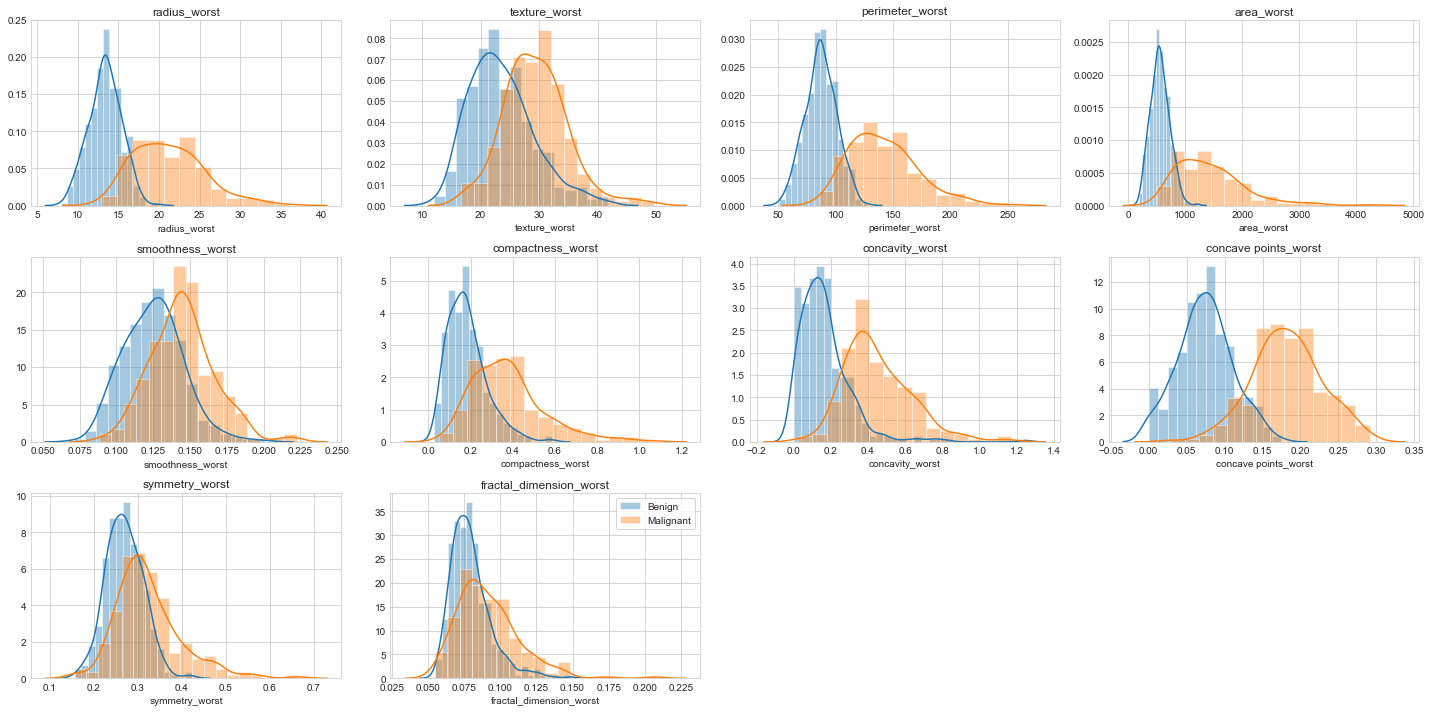

In [63]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(Data_n[b], kde=True, label='Benign')
    sns.distplot(Data_y[b], kde=True, label='Malignant')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

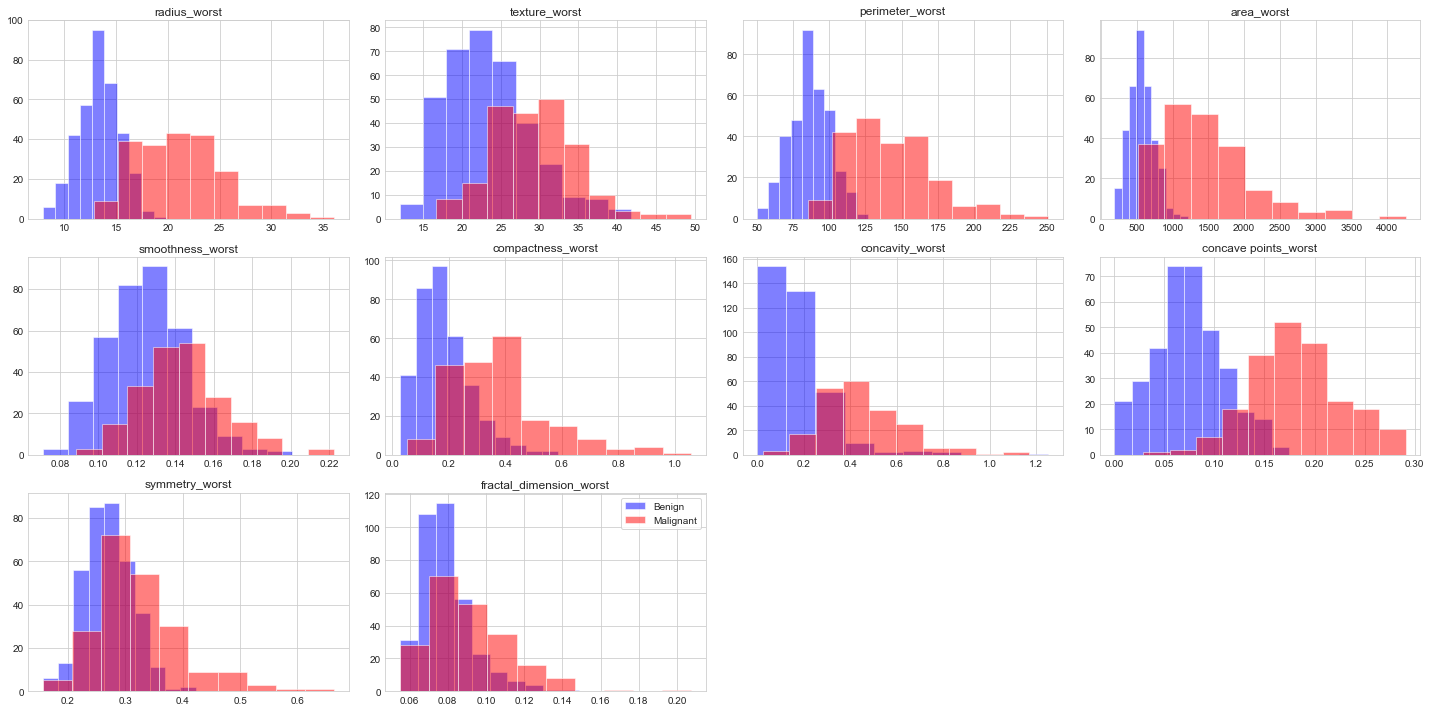

In [64]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(Data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(Data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

No handles with labels found to put in legend.


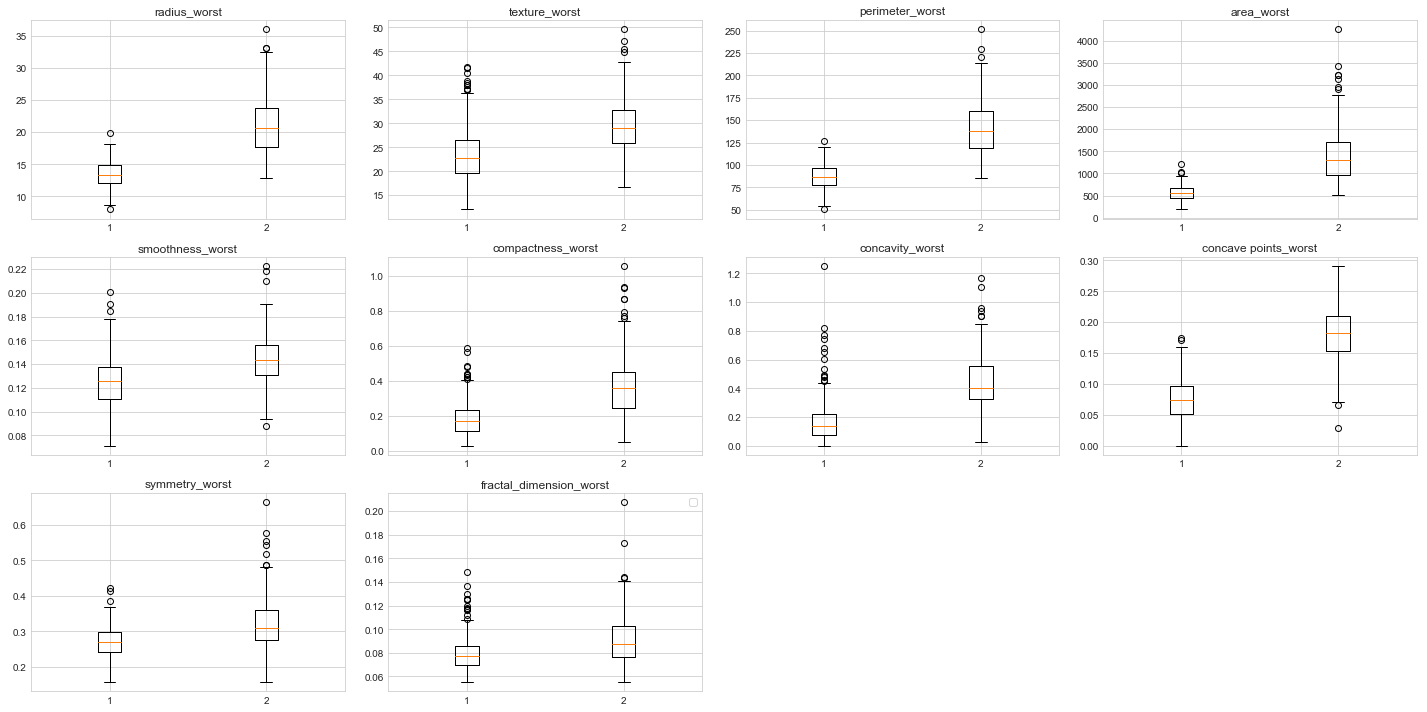

In [65]:

fig = plt.figure(figsize=(20,10))

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(Data.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    plt.boxplot([Data_n[b], Data_y[b]])
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

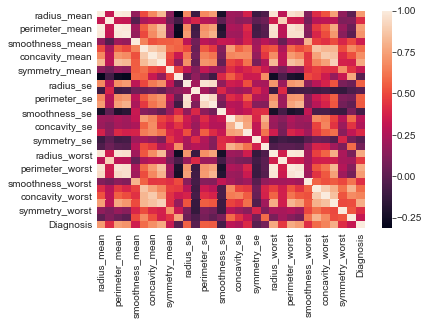

In [66]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(Data.corr())
sns.set_style("whitegrid")
plt.show()

## Data Preprocessing
* Split data into training and test sets
* Normalize data to account for feature scaling

In [43]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(Data.iloc[:,:-1], Data['Diagnosis'], train_size = .8 )

In [44]:
# The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Model Testing
* We'll start by testing a variety of algorithms using scikit-learns's gridsearch method for model optimization. 
* Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier).

In [45]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}

In [46]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))

In [47]:
results = []
names = []


def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
    for name, model, params in models_opt:
    
        kfold = KFold(len(X_train_norm), n_folds=5, random_state=2, shuffle=True)

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)

In [48]:
estimator_function(models_opt, scoring = 'accuracy')

Cross Validation Accuracy LR: Accarcy: 0.907692 SD: 0.020382
Cross Validation Accuracy LDA: Accarcy: 0.960440 SD: 0.021534
Cross Validation Accuracy KNN: Accarcy: 0.901099 SD: 0.012038
Cross Validation Accuracy DTC: Accarcy: 0.931868 SD: 0.027274
Cross Validation Accuracy RFC: Accarcy: 0.947253 SD: 0.026374
Cross Validation Accuracy SVM: Accarcy: 0.918681 SD: 0.020382


In [50]:
# Guassian Naive Bayes does not require optimization so we will run it separately without
# gridsearch and append the performance results to the results and names lists.

# Instantiate model
GNB =  GaussianNB()

# Define kfold - this was done above but not as a global variable 
kfold = KFold(len(X_train_norm), n_folds=5, random_state=2, shuffle=True)

# Run cross validation
cv_results_GNB= cross_val_score(GNB,X_train_norm, y_train, cv = kfold )

# Append results and names lists
results.append(cv_results_GNB)
names.append('GNB')

In [51]:
# Ensemble Voting

from sklearn.ensemble import VotingClassifier

# Create list for estimatators
estimators = []

# Create estimator object
model1 = LogisticRegression()

# Append list with estimator name and object
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = GaussianNB()
estimators.append(("GB", model6))
model7 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model7))


voting = VotingClassifier(estimators)


results_voting = cross_val_score(voting, X_train_norm, y_train, cv=kfold)

results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

Accuracy: 0.9384615384615385 SD: 0.028316700498296973


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


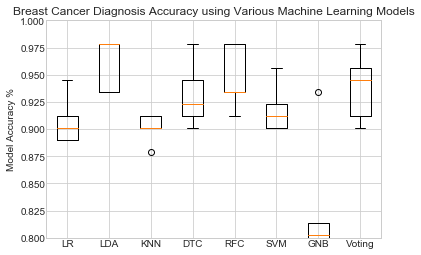

In [52]:
# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results, labels = names)
plt.title('Breast Cancer Diagnosis Accuracy using Various Machine Learning Models')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.ylim(0.8,1)
plt.show()

### Follow-up Model Testing
* It looks like LDA and RFC performed best during cross validation.
* Next, retry these models on test data after training on the entire training set.

#### Linear Discriminant Analysis (LDA)

In [53]:
# Instantiate a new LDA model
lda_2 = LinearDiscriminantAnalysis()

# Fit LDA model to the entire training data
lda_2.fit(X_train_norm, y_train)

# Test LDA model on test data
lda_2_predicted = lda_2.predict(X_test_norm)

In [54]:
# Use sklearn's 'accuracy_score' method to check model accuracy during testing
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))

Linear discriminant model analyis Accuracy is: 0.9736842105263158


In [55]:
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_test, lda_2_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )

print('Linear discriminant Model Confusion Matrix')
confusion_matrix_lda

Linear discriminant Model Confusion Matrix


,Predicted Negative,Predicted Postive
Actual Negative,71,1
Actual Positive,2,40


In [56]:
print('Linear discriminant Model Classification Report')
print(classification_report(y_test, lda_2_predicted))

Linear discriminant Model Classification Report
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        72
          1       0.98      0.95      0.96        42

avg / total       0.97      0.97      0.97       114



#### Test Random Forest Classifier

In [57]:
# Parameters
RF_params = {'n_estimators':[10,50,100, 200]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(RFC_2_grid.best_params_.values()))

Optimized number of estimators: dict_values([200])


In [58]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
RFC_3_predicted = RFC_3.predict(X_test_norm)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, RFC_3_predicted)))

Model accuracy on test data: 0.9824561403508771


In [64]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(list(zip(RFC_3.feature_importances_, Data.columns[:-1])), columns = ['Importance', 'Features'])

# Sort in descending order for easy organization and visualization
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

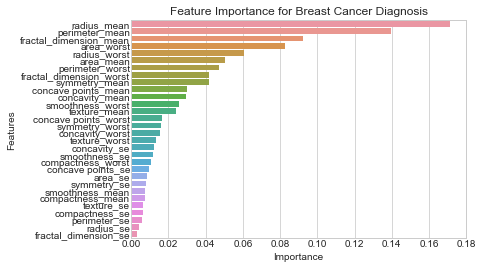

In [65]:
# Visualize RFC feature importances
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

In [88]:
rfc_features.Features[:5]

0                radius_mean
2             perimeter_mean
9     fractal_dimension_mean
23                area_worst
20              radius_worst
Name: Features, dtype: object

### Features Selection with Logistic Regression and Recursive Feature Elimination

In [89]:
# Instantiate new logistic regression for use with scikit-learn's recursive feature elimination...
# with cross validation (RFECV)
lr_2 = LogisticRegression()

# Instantiate RFECV with logistic regression classifier
selector = RFECV(lr_2, cv = 10, scoring='accuracy')

# Fit RFECV to training data
selector.fit(X_train_norm, y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Logistic Regression Model Accuracy with Feature Elimination
Optimal number of features: 30
30
<class 'numpy.ndarray'>
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Diagnosis'],
      dtype='object')
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se'

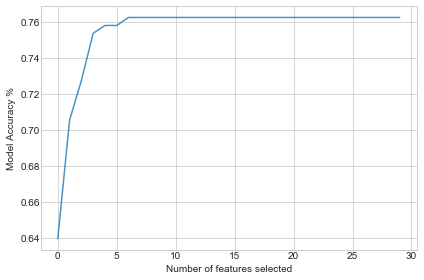

In [90]:
#Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Model Accuracy %")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Logistic Regression Model Accuracy with Feature Elimination')
print('Optimal number of features: {}'.format(selector.n_features_))
print(len(selector.support_))
print(type(selector.support_))
selector.support_=np.append(selector.support_,True)
print((Data.columns))
print([i for i in list(Data.columns[selector.support_])])
plt.show()

## Dimensional Reduction

Use dimensional reduction to reduce our 30 features into principal components (PCA) that maximally explain the data variance. While other forms of dimensional reduction exist (factor analysis, LDA, etc.), PCA is common approach and worth exploring with this data set.

#### Evaluation of Variance with PCA Component Number

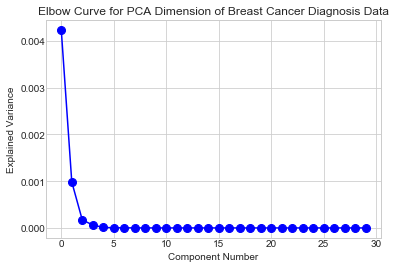

In [91]:
# Instantiate PCA
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()


#### Visualization data by PCA  - 3D

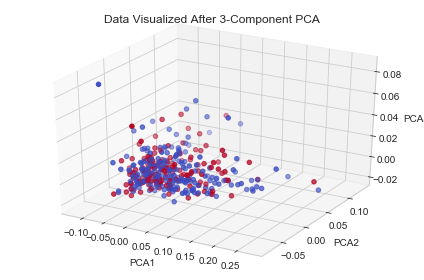

In [71]:
#Instantiate new PCA object
pca = PCA(n_components=3)

# Fit and transform training data with PCA using 3 components
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)

# Create a dataframe of 3 PCA
pca_df = pd.DataFrame(X_train_norm_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Append diagnosis data into PCA dataframe
pca_df['Diagnosis'] = y_train

# Visualize PCA in a 3D plot - color points by diagnsosis to see if a visuale stratification occurs
pca_fig = plt.figure().gca(projection = '3d')
pca_fig.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['Diagnosis'], cmap=cm.coolwarm)
pca_fig.set_xlabel('PCA1')
pca_fig.set_ylabel('PCA2')
pca_fig.set_zlabel('PCA3')
pca_fig.set_title('Data Visualized After 3-Component PCA')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

In [72]:
# Next, test logistic regression performance using PCA and scikit-learn's pipeline method.

# Create features list to use to instantiate the FeatureUnion
features = []

# Append features list
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=10)))

# Instantiate FeatureUnion object
feature_union = FeatureUnion(features)

# Create pipeline using esimator list, append with feature union and logistic regression
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))

# Instantiate model using pipeline method
model_feature_union = Pipeline(estimators)

# Evaluate Pipeline model performance using cross validation
results_feature_union = cross_val_score(model_feature_union, X_train_norm, y_train, cv=kfold)

In [73]:
# Append results and names lists
results.append(results_feature_union)
names.append('LR-PCA')

Mean accuracy is for logistic regression after PCA is: 0.8219780219780219 which is poorer than model accuracy without 
dimensional reduction.


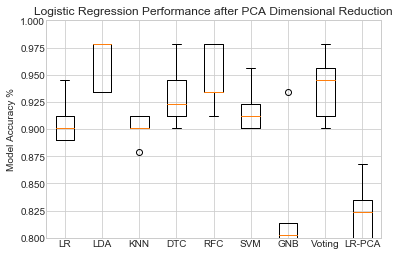

In [74]:
print('Mean accuracy is for logistic regression after PCA is: {} which is poorer than model accuracy without \ndimensional reduction.'.format(results_feature_union.mean()))


plt.boxplot( results, labels = names)
plt.ylabel('Model Accuracy %')
plt.ylim(.8,1)
plt.title('Logistic Regression Performance after PCA Dimensional Reduction')
plt.show()

# Summary

* Breast cancer diagnosis can be predicted with roughly 95% accuracy using these 30 histological tumor characteristics.
* Machine learning algorithms that performed the best include linear models: logistic regression and linear discriminant analysis and two ensemble algorithms: random forest and an ensemble voting classifier.
* The most predictive features found with recursive feature elimination and cross validation using logistic regression as a classifier are: mean texture, perimeter and area, and worst texture, perimeter, and area. 
* The most predictive features using random forest classification are: mean texture perimeter and area, fractal dimension, and worst area perimeter.